01 - Exploratory Data Analysis (TMDB Movie Dataset)


Bu notebook’ta TMDB film verisini inceliyoruz. Veri yapısını, eksik değerleri, dağılımları ve korelasyonları analiz ederek modelleme için zemin hazırlıyoruz.

İçerik:

Dataset yükleme

Eksik değer analizi

JSON kolonlarının incelenmesi

Temel istatistikler

Sayısal özellik dağılımları

Kategorik özellik dağılımları

Korelasyon analizi

In [3]:
import pandas as pd

df = pd.read_csv('/content/tmdb_5000_movies.csv')
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Hangi sütunlarda ne kadar eksik veri olduğunu inceliyoruz


In [4]:
df.isnull().sum()


,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


# JSON Kolonlarının Yapısı

 Listeler ve sözlükler içeren özel kolonların yapısını anlamak için örnek değerlere bakıyoruz

In [5]:
json_cols = ["genres", "keywords", "production_companies",
             "production_countries", "spoken_languages"]

df[json_cols].head()


,genres,keywords,production_companies,production_countries,spoken_languages
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [6]:
df.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Korelasyon Analizi

Sayısal sütunların hedef değişkenle olan ilişkisini inceliyoruz.
Hangi özelliklerin daha anlamlı olabileceğine dair fikir verir

In [7]:
df.corr(numeric_only=True)['vote_average'].sort_values(ascending=False)


,vote_average
vote_average,1.000000
runtime,0.375046
vote_count,0.312997
popularity,0.273952
revenue,0.197150
budget,0.093146
id,-0.270595


## **Sayısal değişken histogramları**
Grafikler;
bütçe dağılımı,
gelir dağılımı,
popülerlik dağılımı,
oy sayısı dağılımı,
oy ortalaması dağılımı gibi şeyleri gösterir.

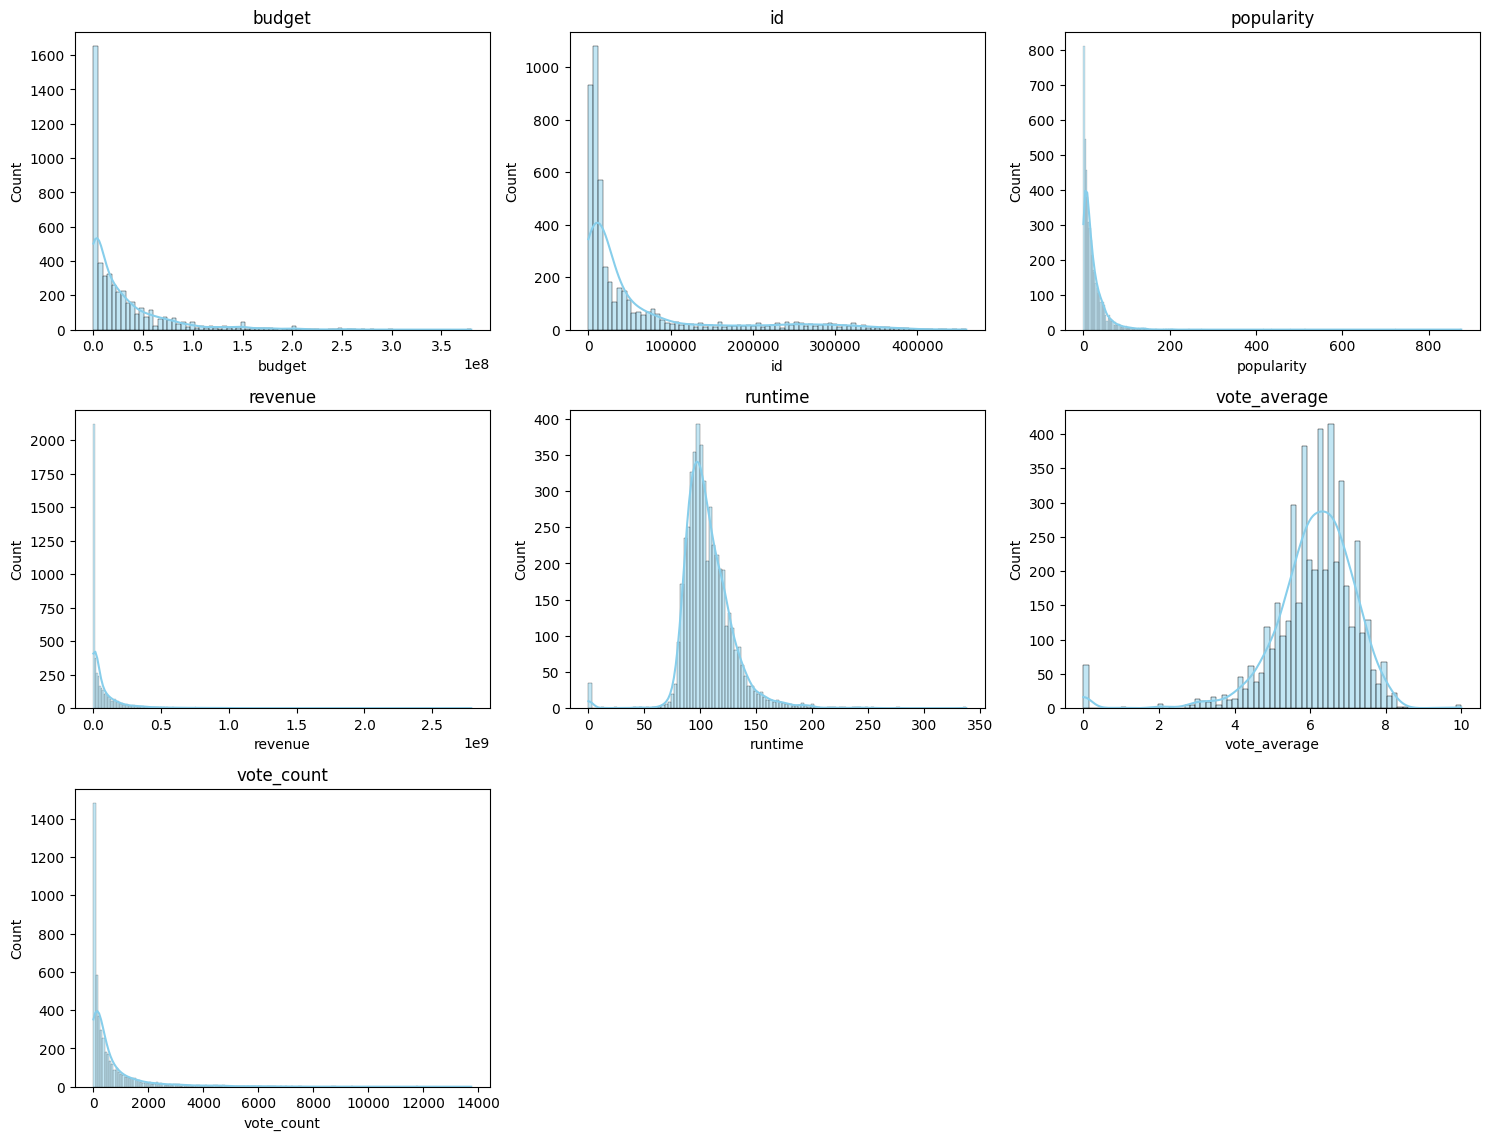

In [8]:
import matplotlib.pyplot as plt  #matplotlib: klasik grafik çizme
import seaborn as sns            #seaborn: estetik grafikler için

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns #df icinde sadece sayısal sütunları seciyor

plt.figure(figsize=(15, 30))    #grafiklerin büyük ve okunaklı olması için tuvali ayarlıyoruz, 15x30

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')    #histogram ciziyor
    plt.title(col)       #her grafiğe adını giriyor

plt.tight_layout()
plt.show()         # her grafiği ekrana bastırıyor


# Kategorik kolonların incelenmesi

In [9]:
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head())




--- genres ---
genres
[{"id": 18, "name": "Drama"}]                                       370
[{"id": 35, "name": "Comedy"}]                                      282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]     164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]    144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]         142
Name: count, dtype: int64

--- homepage ---
homepage
http://www.missionimpossible.com/    4
http://www.thehungergames.movie/     4
http://www.kungfupanda.com/          3
http://www.transformersmovie.com/    3
http://www.thehobbit.com/            3
Name: count, dtype: int64

--- keywords ---
keywords
[]                                                  412
[{"id": 10183, "name": "independent film"}]          55
[{"id": 187056, "name": "woman director"}]           42
[{"id": 179431, "name": "duringcreditsstinger"}]     15
[{"id": 6075, "name": "sport"}]                      13
Name: count, dtype: int64

--- origi

# JSON kolonlarının bir örneğini görsel olarak açma

In [10]:
import ast

sample = df['genres'].iloc[0]
print(sample)

parsed = ast.literal_eval(sample)
parsed

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

# Korelasyon haritası (heatmap)
hangi değişken hedef değişkeni nasıl etkiliyor, yeni featurelar çıkartılabilir.

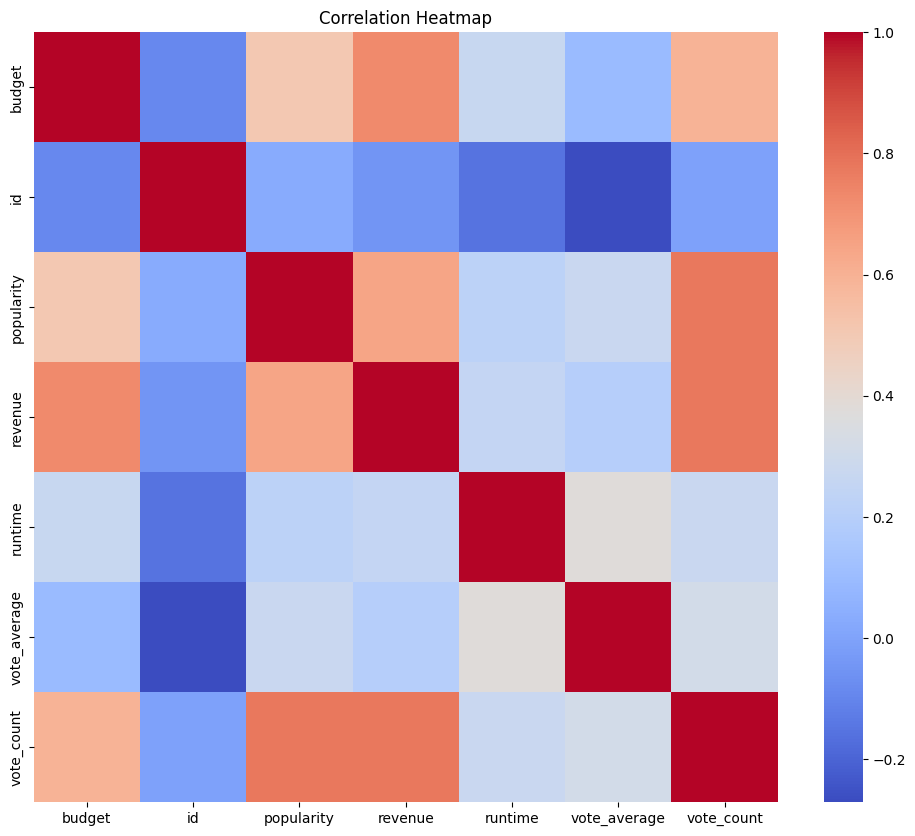

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


# EDA SONUCLAR
Dataset 4800 film içeriyor.

Eksik değerler: homepage, tagline gibi sütunlarda yoğun.

Sayısal değişkenlerde yüksek right-skew (budget, revenue, popularity).

vote_average hedef değişken olarak modellemeye uygun.

En yüksek korelasyonlar:

vote_count

popularity

budget

JSON kolonları (genres, keywords, companies) düzgün yapılandırılmış.

Veri genel olarak temiz, modellemeye hazır.